<a href="https://colab.research.google.com/github/javohiryoldashovBigData/Training_project_for_Decision_Tree/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [ ]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
186,70,M,HIGH,HIGH,9.849,drugB
69,18,F,HIGH,NORMAL,24.276,drugY
50,58,F,HIGH,HIGH,19.416,drugY
183,36,F,HIGH,NORMAL,15.490,drugY
62,67,M,LOW,NORMAL,20.693,drugY
42,50,M,NORMAL,NORMAL,15.790,drugY
61,24,M,HIGH,NORMAL,9.475,drugA
82,32,F,LOW,HIGH,9.712,drugC
57,40,M,HIGH,HIGH,27.826,drugY
140,49,M,HIGH,NORMAL,6.269,drugA


Transform string to number

In [ ]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
93,42,0,1,1,29.271,drugY
13,74,0,1,0,20.942,drugY
157,53,1,1,0,22.963,drugY
16,69,1,1,1,11.455,drugX
48,23,1,2,0,31.686,drugY
10,47,0,1,0,11.767,drugC
138,51,1,0,1,11.343,drugB
163,21,0,0,1,28.632,drugY
151,68,1,0,0,11.009,drugB
169,20,0,0,0,11.262,drugA


Making X and y

In [ ]:
X = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [ ]:
y = df['Drug'].values

Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

Model

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = tree_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [ ]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  0.95


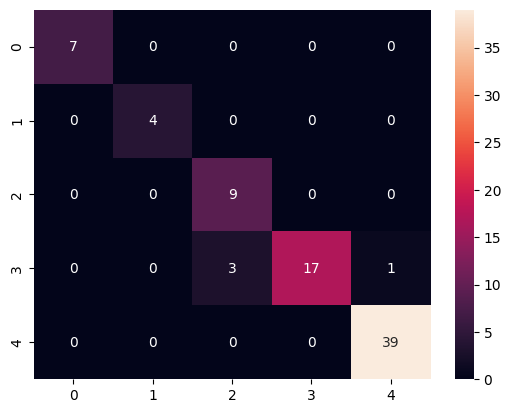

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

Cross-validation

In [ ]:
predict = cross_val_predict(estimator = tree_model, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



Decision Tree Making

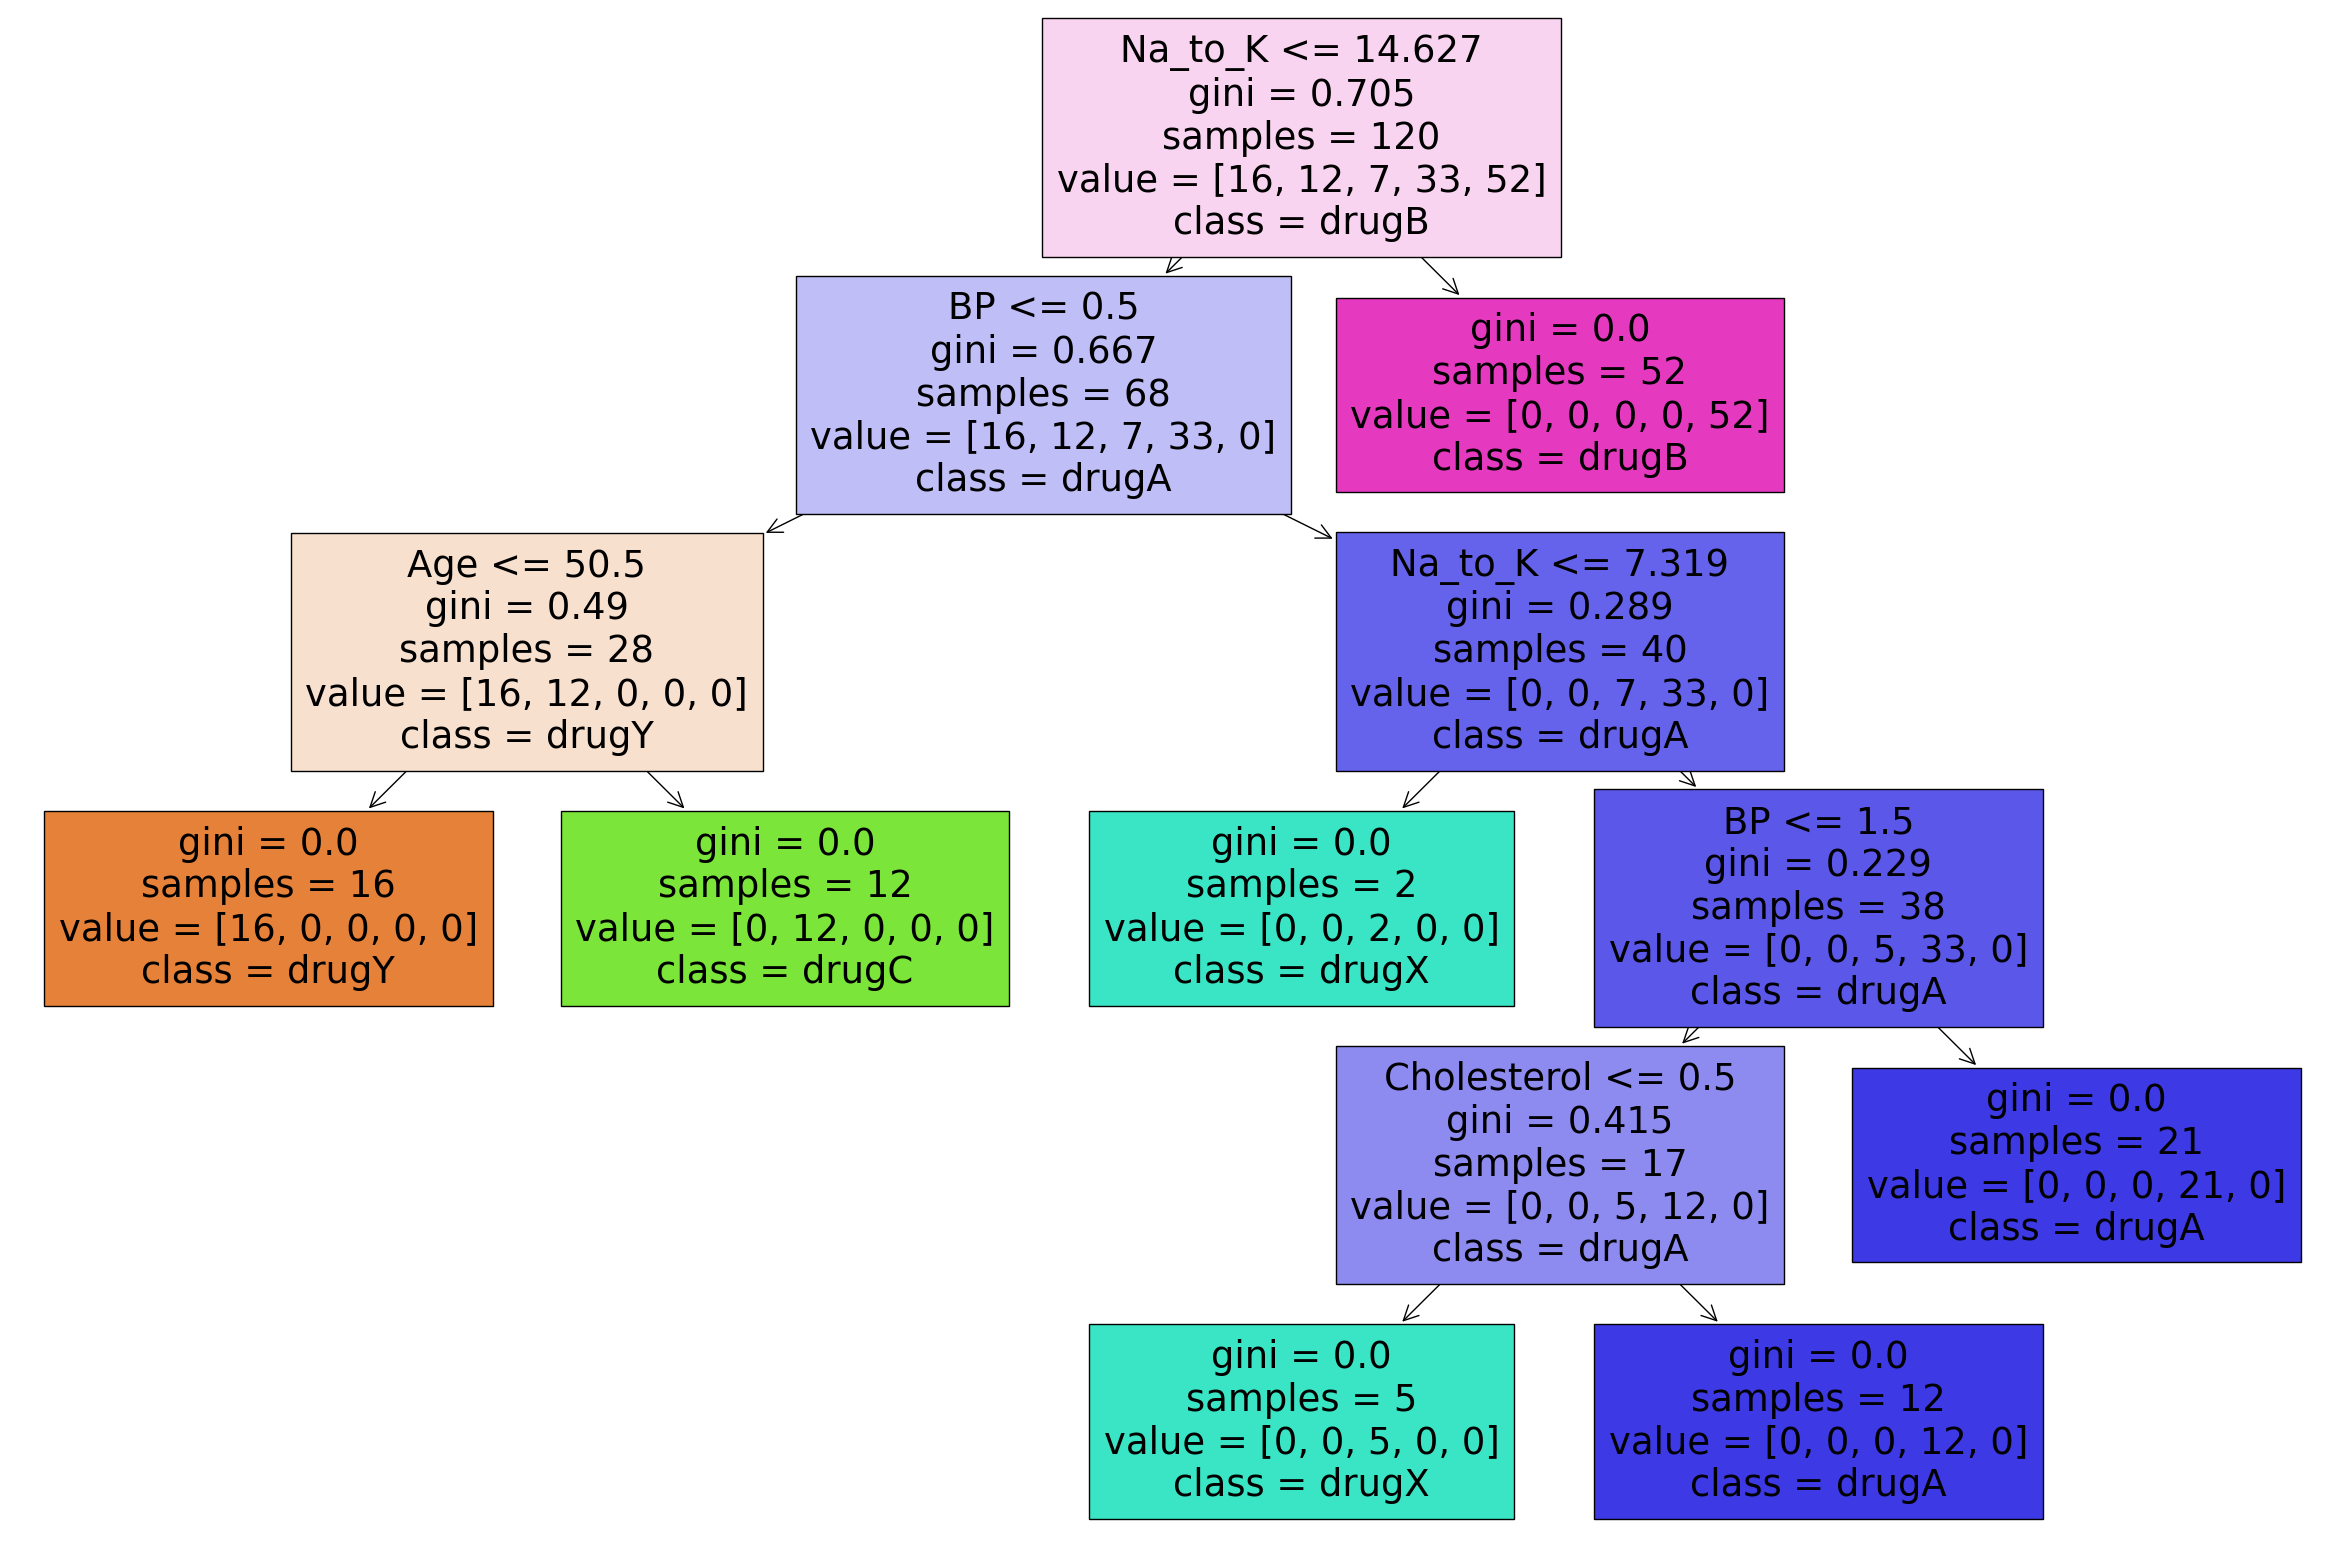

In [ ]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True)
plt.show()

DecisionTrees's Accuracy:  0.95


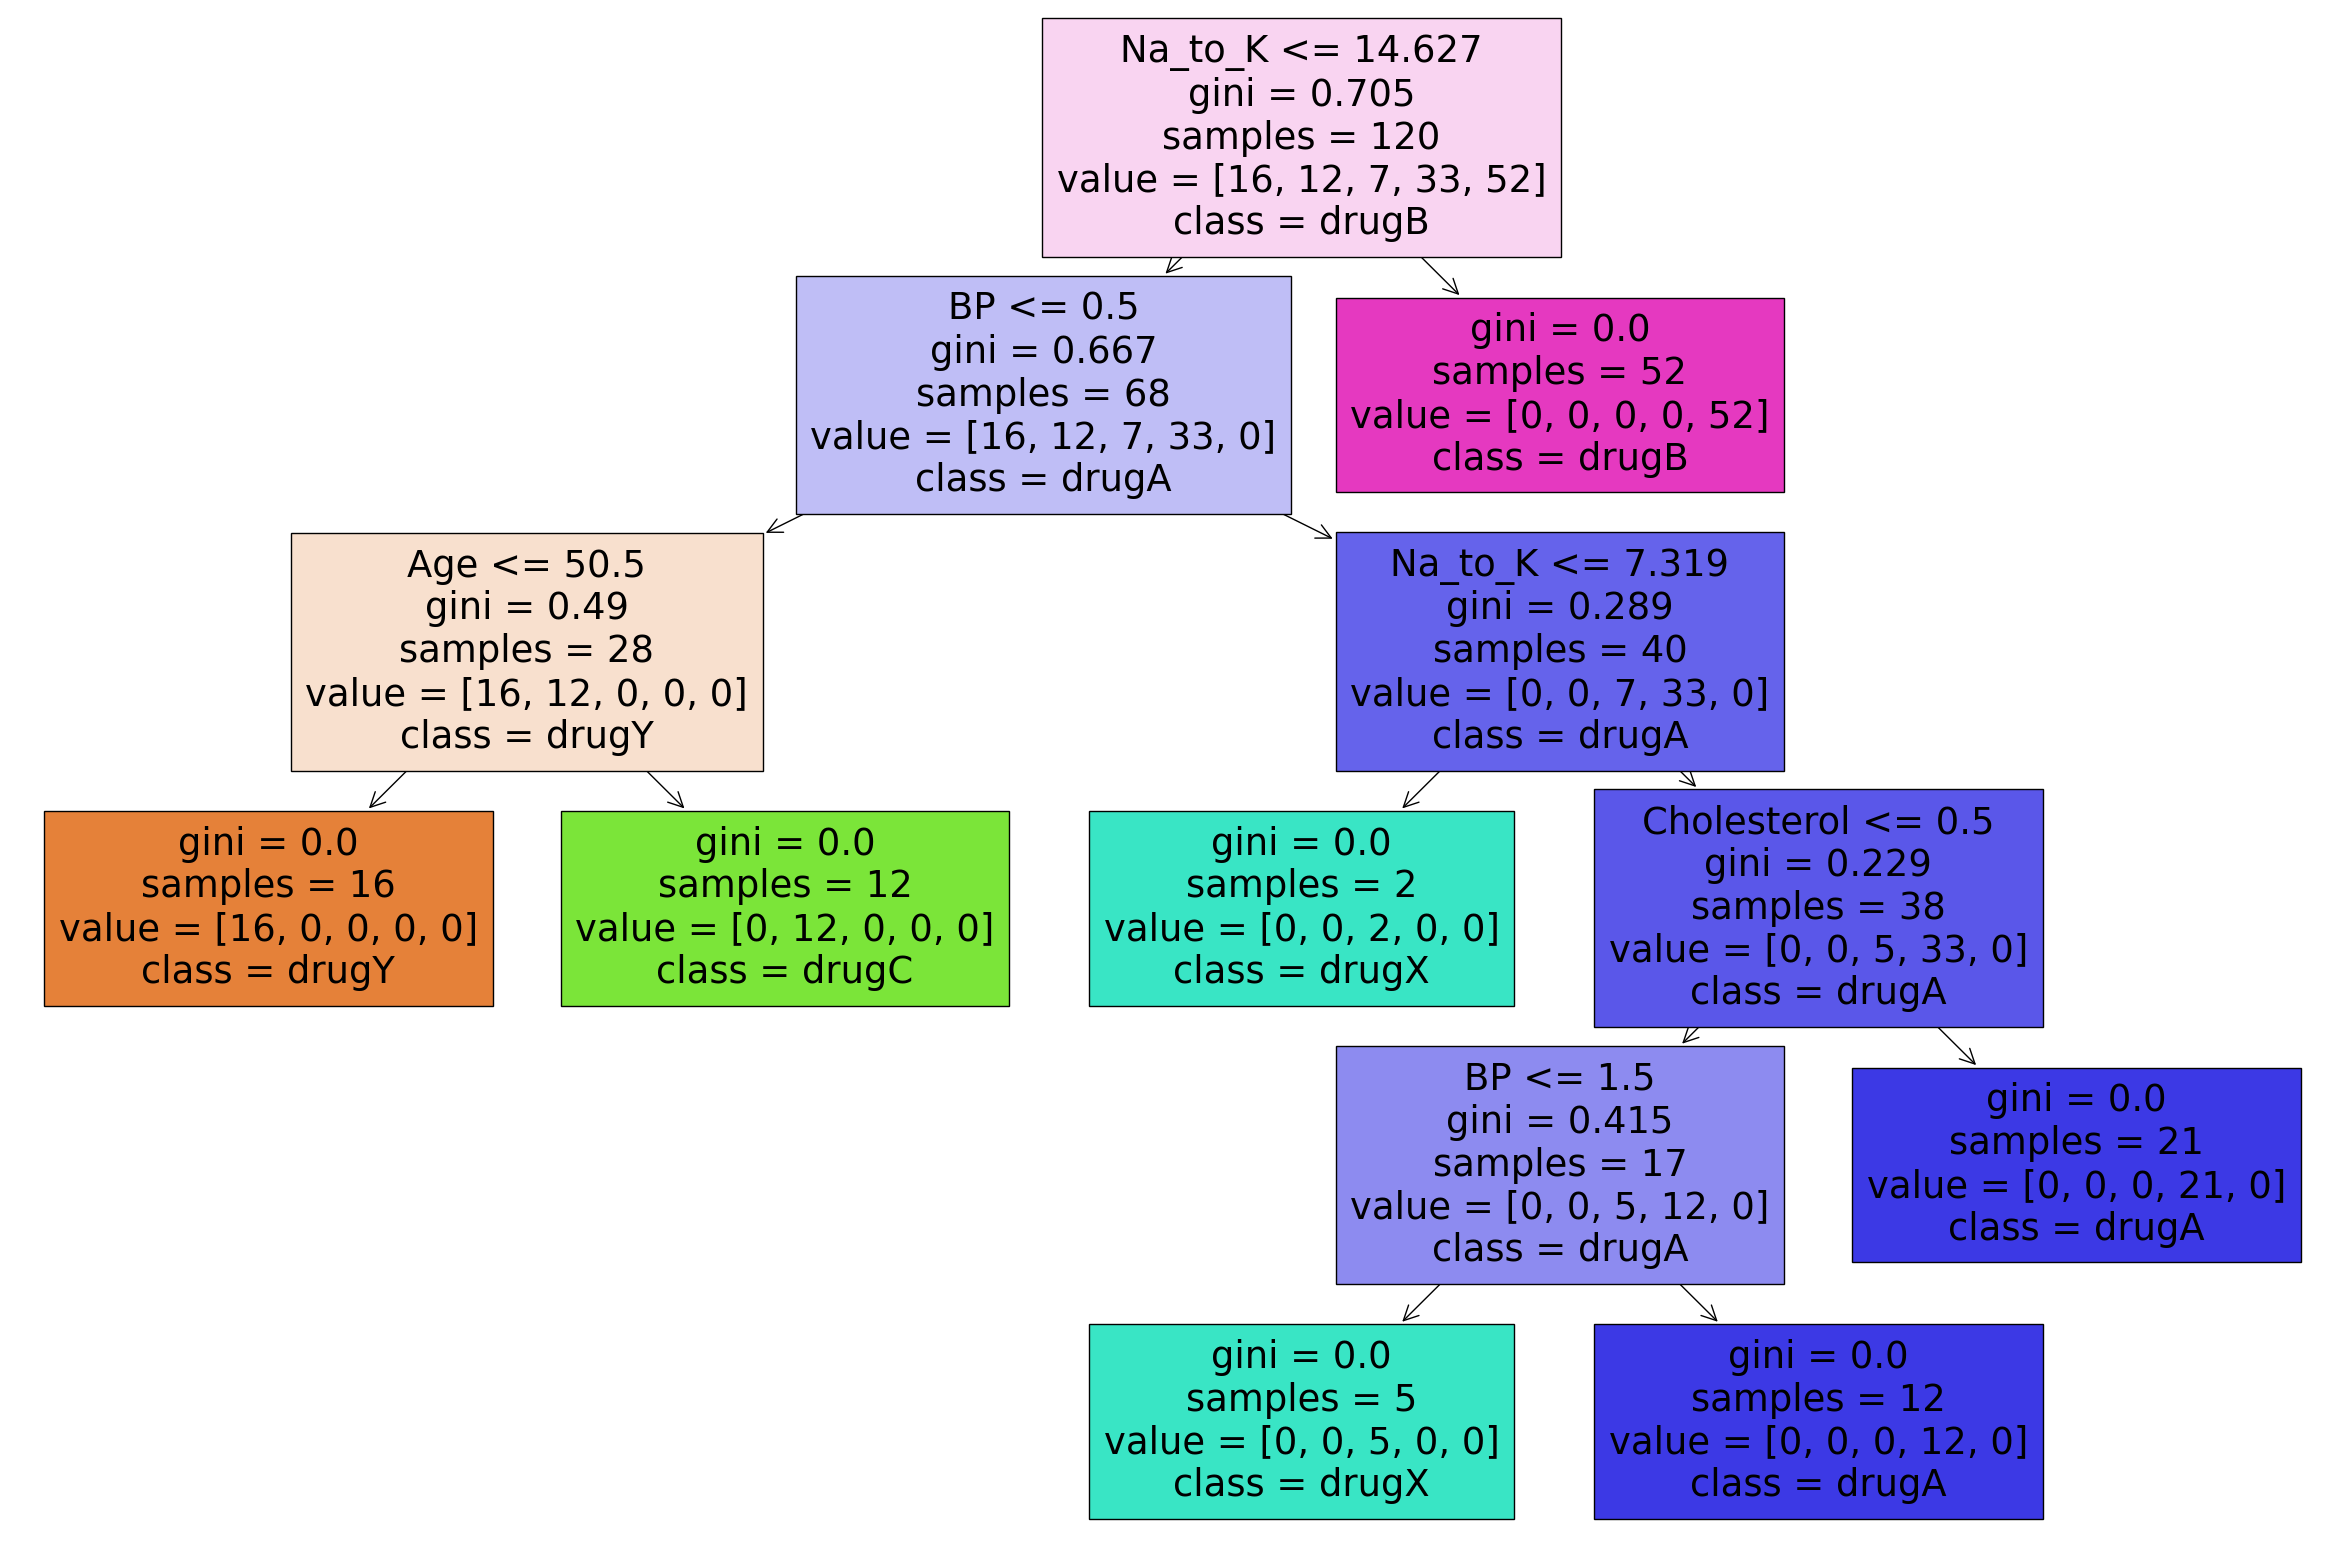

In [ ]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

DecisionTrees's Accuracy:  0.8375


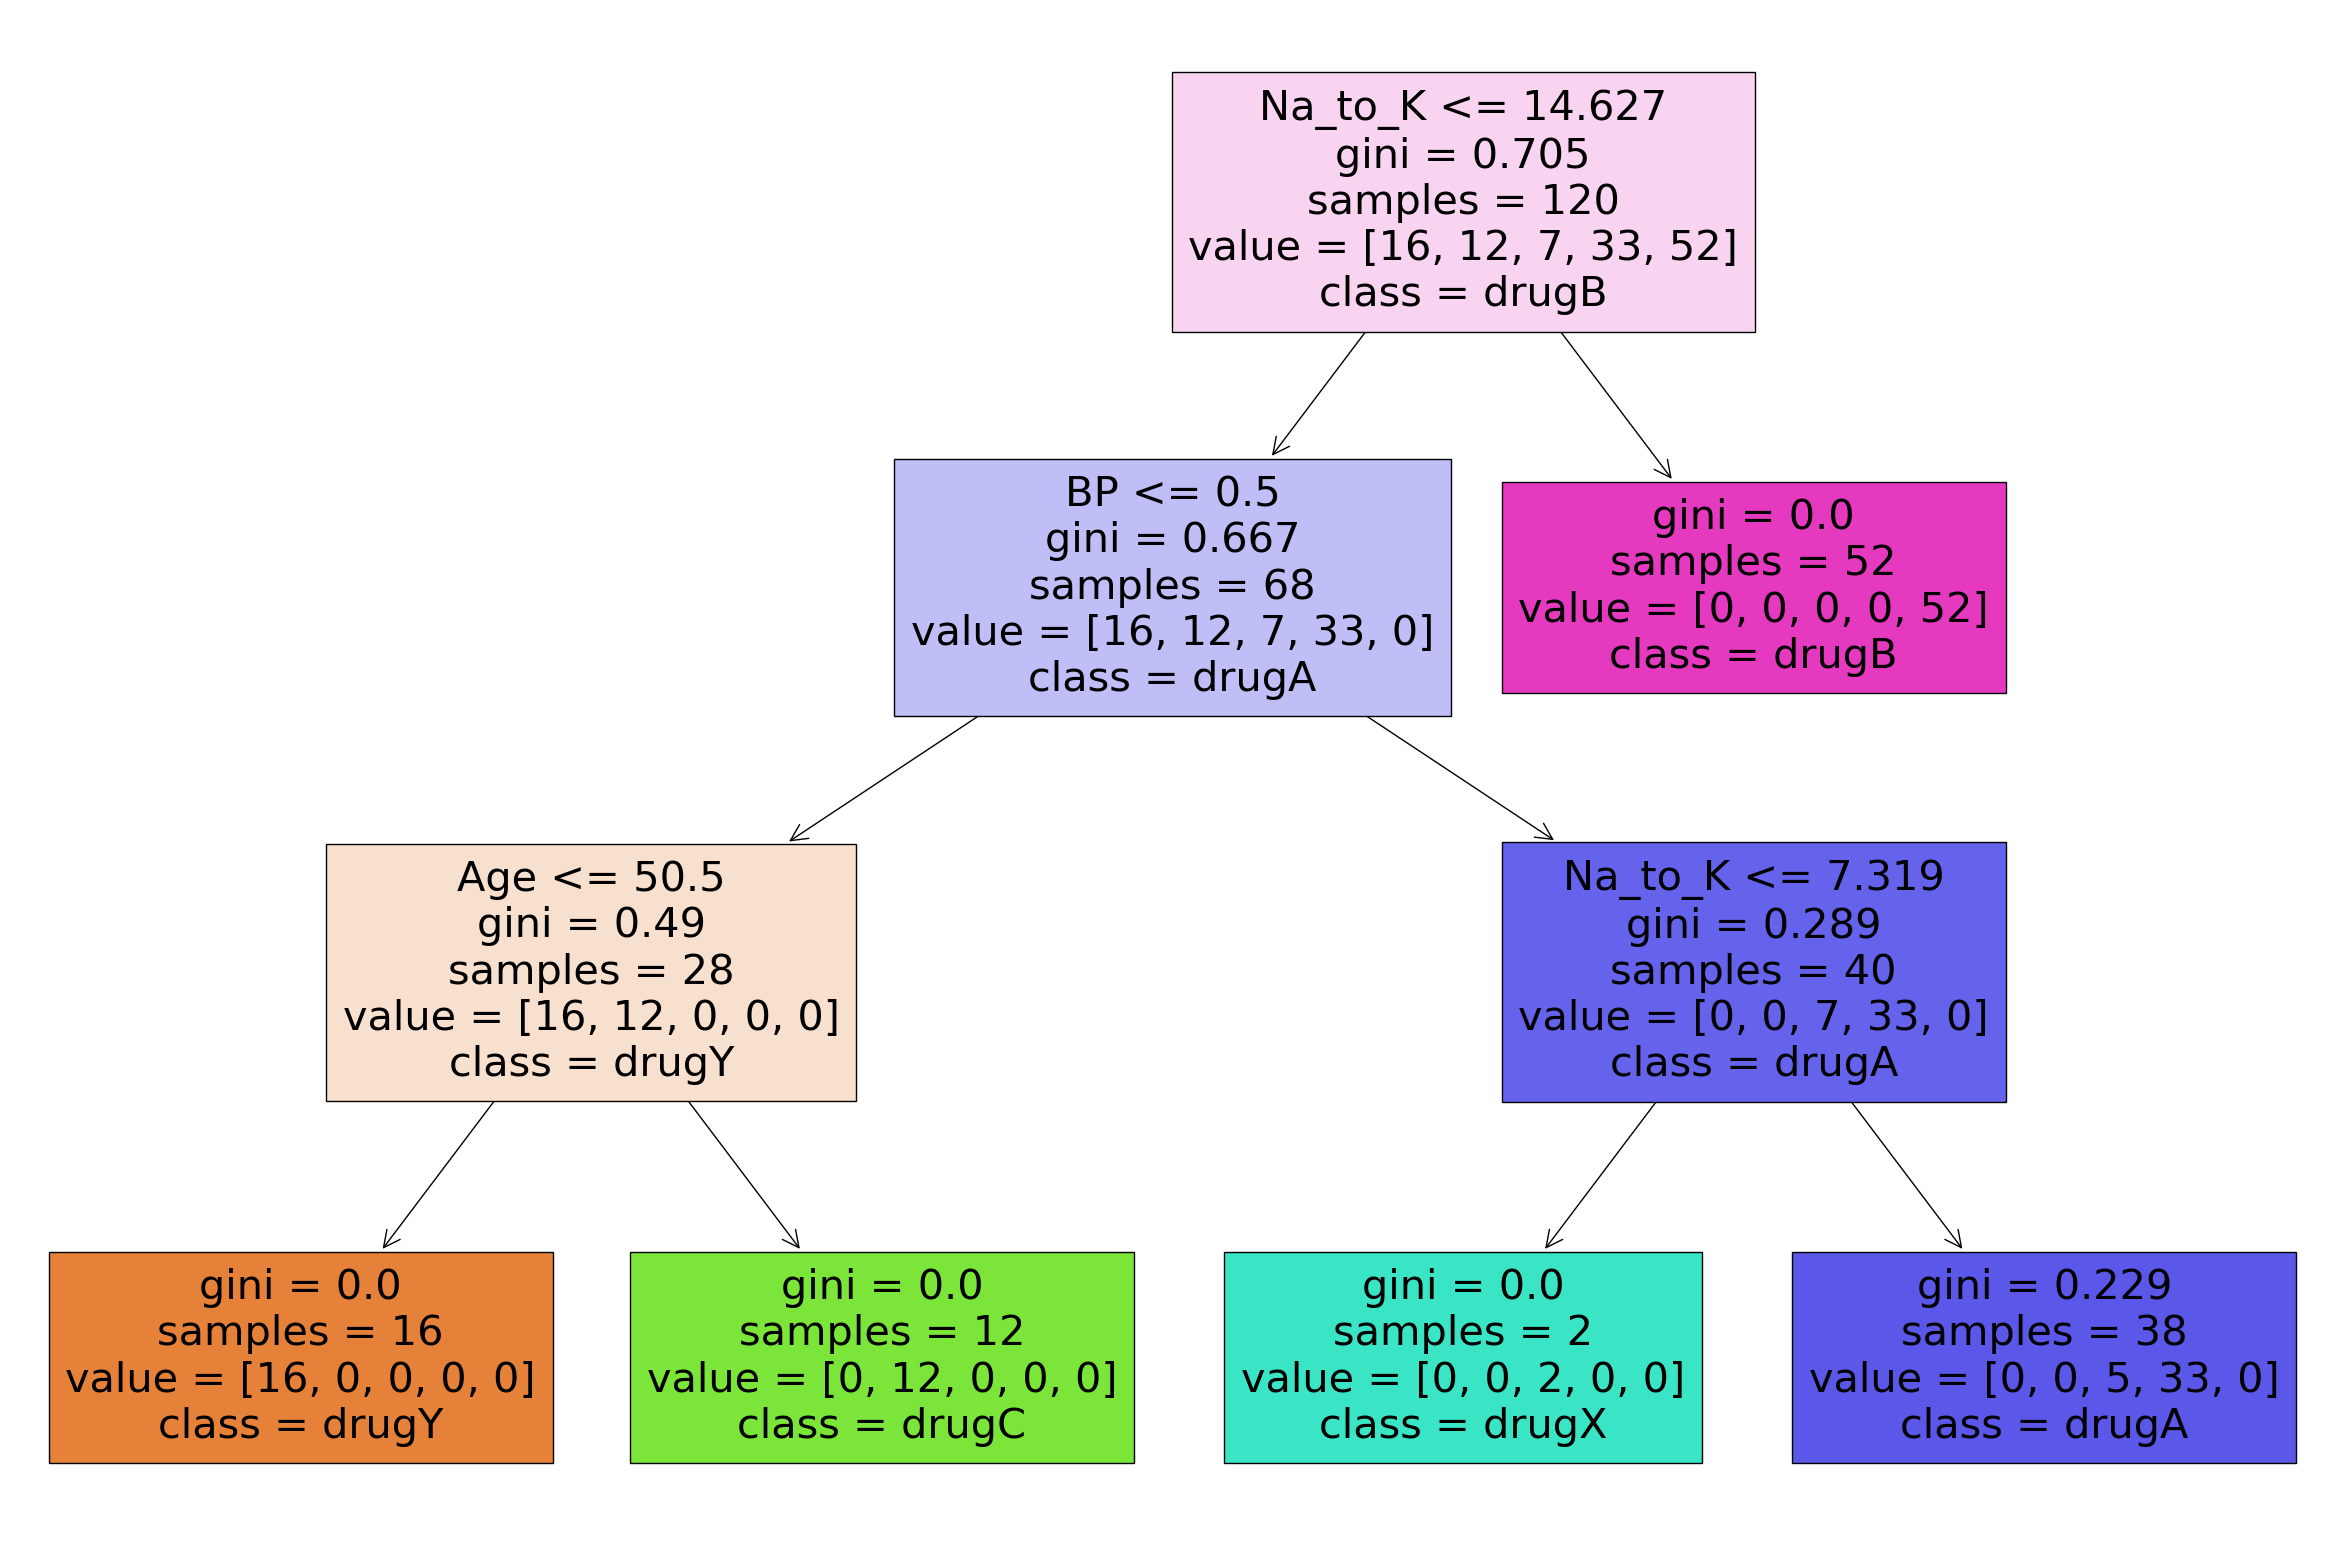

In [ ]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

DecisionTrees's Accuracy:  0.875


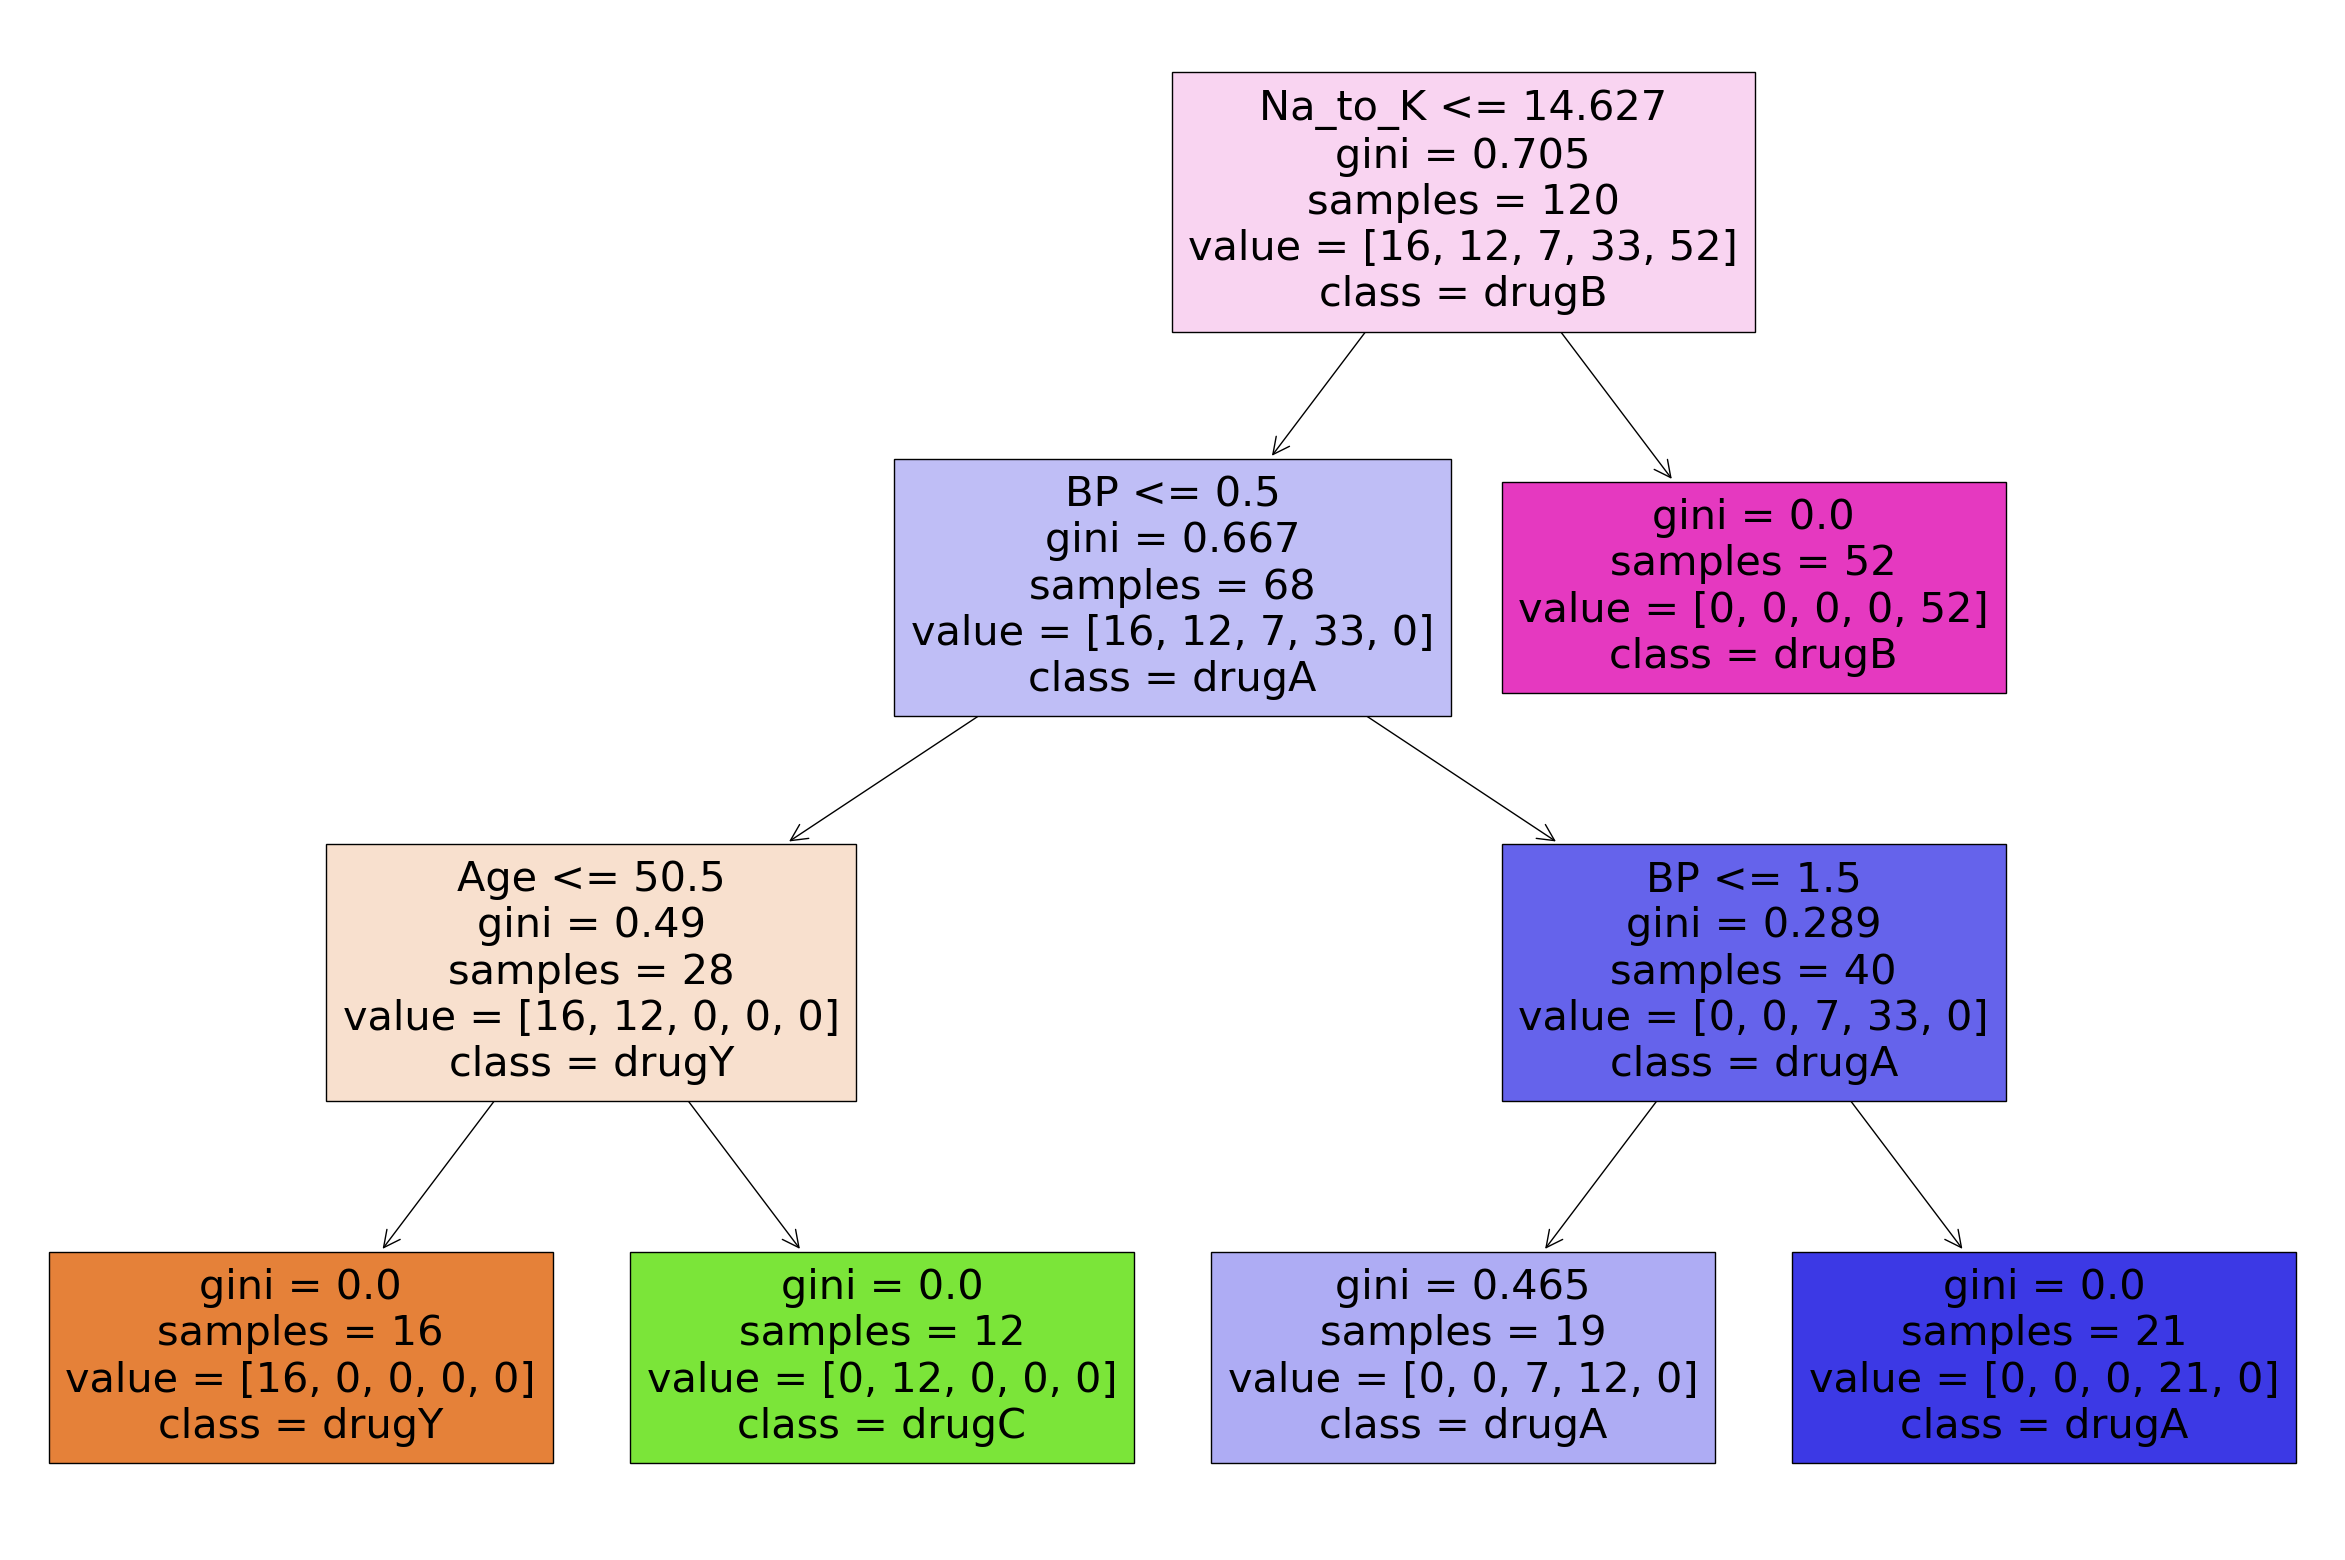

In [ ]:
tree_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.95      0.98        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

